## MODEL 1: LINEAR REGRESSION (STUDENT SCORED)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [10]:
data = pd.read_csv(url)
data.shape

(25, 2)

In [12]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [19]:
mean = data['Hours'].mean()
mean

5.012

In [21]:
mean_scores = data['Scores'].mean()
mean_scores

51.48

In [23]:
Q1 = data['Scores'].quantile(0.25)
Q3 = data['Scores'].quantile(0.75)
IQR = Q3 - Q1

### Detecting outliers

In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Scores'] < lower_bound) & (data['Scores'] > upper_bound)]
outliers

,Hours,Scores


In [32]:
clean_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [34]:
clean_data = data - outliers
clean_data = data[(data['Scores'] >= lower_bound) & (data['Scores'] <= upper_bound)]

In [36]:
y = clean_data['Scores']
X = clean_data[['Hours']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_predict = model.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [44]:
mse

18.943211722315272

In [46]:
r2

0.9678055545167994

In [50]:
test_hours = [[12]]
predicted_score = model.predict(test_hours)
predicted_score_cliped = max(0, min(100, predicted_score))
predicted_score_cliped

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100

## VISUALIZATION SCATTER PLOT

In [55]:
X_line = pd.DataFrame({'Hours': sorted(data['Hours'])})
y_line = model.predict(X_line)

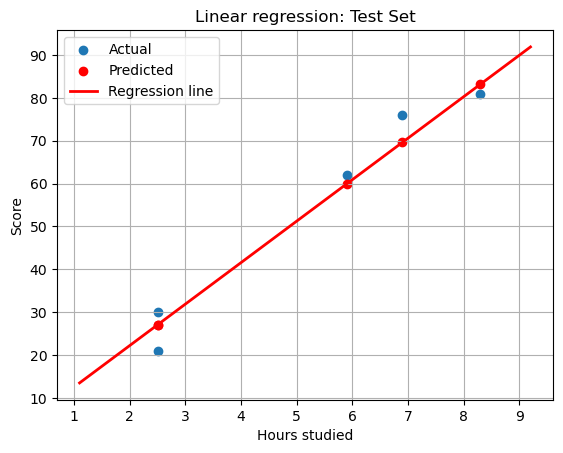

In [57]:
plt.scatter(X_test, y_test, label = 'Actual')
plt.scatter(X_test, y_predict , color = 'red', label = 'Predicted')
plt.plot(X_line, y_line, color = 'red', linewidth = 2, label = 'Regression line')
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.title('Linear regression: Test Set')
plt.legend()
plt.grid(True)
plt.show()